In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [4]:
#### Make a complete analysis on data preprocessing

data = pd.concat([df_train, df_test], axis=0)

# Inconsistencies
print("数据类型：")
print(data.dtypes) 

# Duplicates (data.duplicated().sum())
print("重复行数量：", data.duplicated().sum())

# Missing values (data.isnull().sum())
print("缺失值数量：")
print(data.isnull().sum().sort_values(ascending=False))

# Categorical
print("天气变量分布：")
print(data['weather_condition'].value_counts())

# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

数据类型：
date                          object
weather_condition             object
humidity                     float64
wind_speed                    object
oil_brent_price_indicator     object
temperature_station1         float64
temperature_station2         float64
temperature_station3         float64
temperature_station4         float64
temperature_station5         float64
temperature_station6         float64
temperature_station7         float64
temperature_station8         float64
temperature_station9         float64
temperature_station10        float64
electricity_demand           float64
dtype: object
重复行数量： 90
缺失值数量：
temperature_station10        367
electricity_demand           365
temperature_station7         361
temperature_station9         350
temperature_station1         344
temperature_station3         340
temperature_station5         337
temperature_station8         336
temperature_station2         328
temperature_station6         321
temperature_station4         320
humidity

In [5]:
df_train.shape

(1909, 16)

In [6]:
df_test.shape

(365, 15)

In [7]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]
    
    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,NaN
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,NaN
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,NaN
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,NaN


In [10]:
data['wind_speed']

0      27.74 km/h
1      21.78 km/h
2        6.83 m/s
3        5.79 m/s
4      25.14 km/h
          ...    
360    22.78 km/h
361    18.33 km/h
362      7.24 m/s
363      7.67 m/s
364    30.99 km/h
Name: wind_speed, Length: 2274, dtype: object

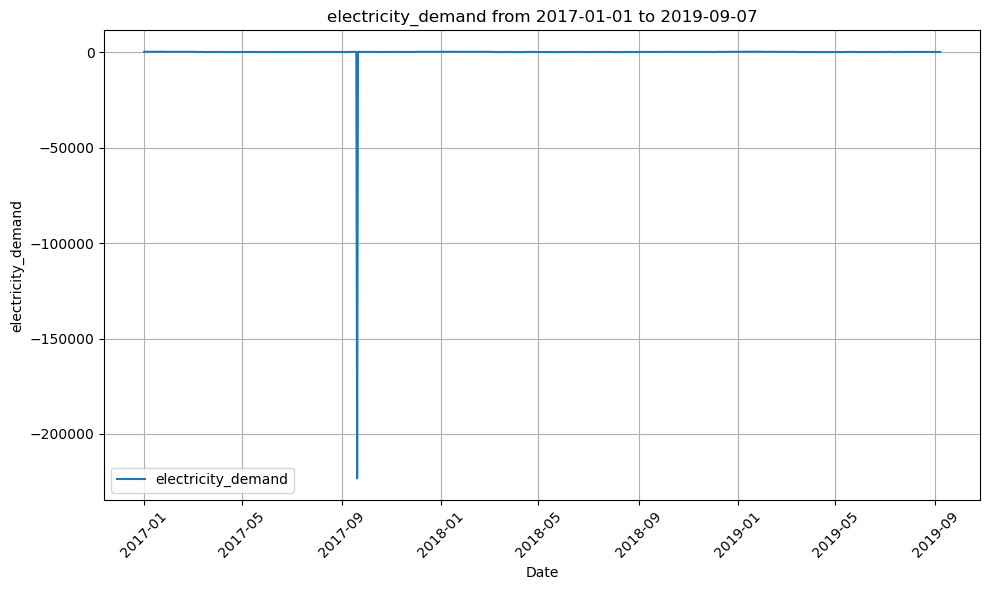

In [11]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2019-09-07')

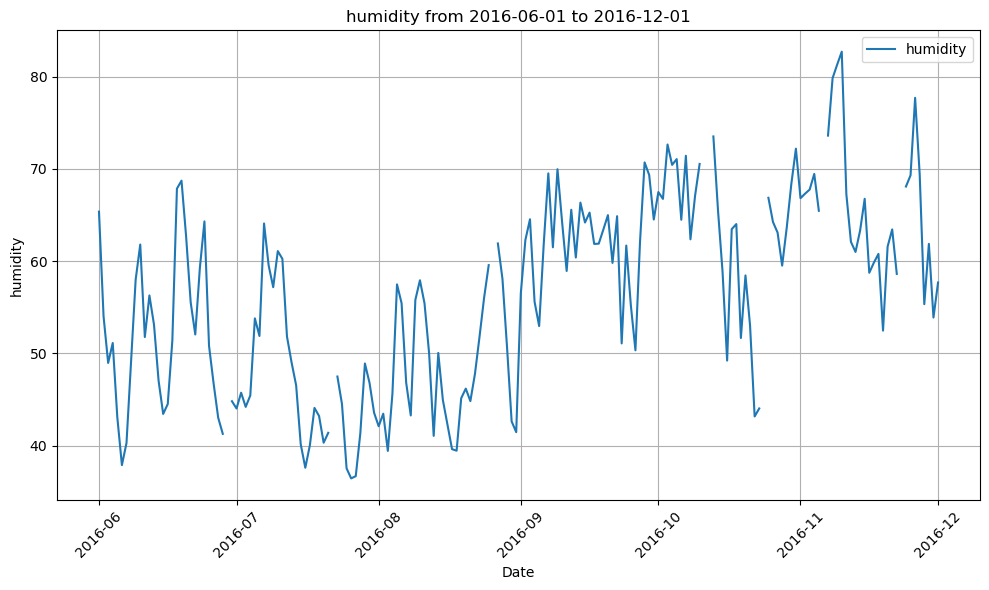

In [12]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

In [13]:
# Provide a complete data preprocessing transformations

In [14]:

# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    def handle_windspeed(windspeed):
        windspeed = str(windspeed).strip()
        if "km/h" in windspeed:
            return float(windspeed.replace("km/h", "").strip())
        elif "m/s" in windspeed:
            return float(windspeed.replace("m/s", "").strip()) * 3.6
        else:
            return float(windspeed)

    X_train['wind_speed'] = X_train['wind_speed'].apply(handle_windspeed)
    if X_val is not None:
        X_val['wind_speed'] = X_val['wind_speed'].apply(handle_windspeed)
        return X_train, y_train, X_val
    return X_train, y_train


# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    before_len = len(X_train)
    X_train_no_duplicates = X_train.drop_duplicates()
    y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
    after_len = len(X_train_no_duplicates)

    if before_len != after_len:
        print(f"Removed {before_len - after_len} duplicate rows.")

    if X_val is not None:
        return X_train_no_duplicates, y_train_no_duplicates, X_val
    return X_train_no_duplicates, y_train_no_duplicates


# 3. Handling Missing Values
def handle_missing_values(X_train, y_train, X_val=None):
    features = [
        'humidity', 'wind_speed',
        'temperature_station1', 'temperature_station2', 'temperature_station3',
        'temperature_station4', 'temperature_station5', 'temperature_station6',
        'temperature_station7', 'temperature_station8', 'temperature_station9',
        'temperature_station10'
    ]

    X_train[features] = X_train[features].ffill()
    if X_val is not None:
        X_val['weather_condition'] = X_val['weather_condition'].fillna('Unknown')
        X_val[features] = X_val[features].ffill()
        return X_train, y_train, X_val
    return X_train, y_train


# 4. Handling Categorical Values
def handle_categorical(X_train, y_train, X_val=None):
    mapping = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}

    X_train_encoded = pd.get_dummies(X_train, columns=['weather_condition'])
    X_train_encoded['oil_brent_price_indicator'] = X_train_encoded['oil_brent_price_indicator'].map(mapping)

    if X_val is not None:
        X_val_encoded = pd.get_dummies(X_val, columns=['weather_condition'])
        X_val_encoded['oil_brent_price_indicator'] = X_val_encoded['oil_brent_price_indicator'].map(mapping)
        # 对齐列
        X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
        return X_train_encoded, y_train, X_val_encoded
    return X_train_encoded, y_train


# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    def IQR_clip(df, columns):
        for column in columns:
            Q1, Q3 = df[column].quantile(0.25), df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            df[column] = np.clip(df[column], lower, upper)
        return df

    def clip_y(y):
        Q1, Q3 = y.quantile(0.25), y.quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        return np.clip(y, lower, upper)

    X_train = IQR_clip(X_train, ['humidity'])
    y_train = clip_y(y_train)

    if X_val is not None:
        X_val = IQR_clip(X_val, ['humidity'])
        return X_train, y_train, X_val
    return X_train, y_train


# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    def add_datetime_features(df):
        df['date'] = pd.to_datetime(df['date'])
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        df['day'] = df['date'].dt.day
        return df

    X_train = add_datetime_features(X_train)
    if X_val is not None:
        X_val = add_datetime_features(X_val)
        return X_train, y_train, X_val
    return X_train, y_train


# 7. Feature Selection
def feature_selection(X_train, X_val=None):
    selected_columns = [
        'humidity',
        'temperature_station1', 'temperature_station2', 'temperature_station3',
        'temperature_station4', 'temperature_station5', 'temperature_station6',
        'temperature_station7', 'temperature_station8', 'temperature_station9',
        'temperature_station10',
        'year', 'month', 'day',
        'oil_brent_price_indicator',
        'weather_condition_Cloudy', 'weather_condition_Sunny',
        'weather_condition_Rainy', 'weather_condition_Snowy'
    ]

    X_train_selected = X_train[selected_columns]
    if X_val is not None:
        X_val_selected = X_val[selected_columns]
        return X_train_selected, X_val_selected
    return X_train_selected


In [15]:
from xgboost import XGBRegressor
def evaluate_pipeline(X, y, n_splits=5):
    # 一次性全局预处理
    X, y = handle_inconsistencies(X, y)
    X, y = handle_duplicates(X, y)
    X, y = handle_missing_values(X, y)
    X, y = handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    X, y = feature_engineering(X, y)
    X = feature_selection(X)

    model = XGBRegressor()
    tscv = TimeSeriesSplit(n_splits=n_splits)

    train_scores, val_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        train_mse = mean_squared_error(y_train, model.predict(X_train))
        val_mse = mean_squared_error(y_val, model.predict(X_val))

        train_scores.append(train_mse)
        val_scores.append(val_mse)

        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")

    # 输出汇总结果
    print("\nTrain MSE:")
    print(f"Mean: {np.mean(train_scores):.4f}, Max: {np.max(train_scores):.4f}, Min: {np.min(train_scores):.4f}")

    print("\nValidation MSE:")
    print(f"Mean: {np.mean(val_scores):.4f}, Max: {np.max(val_scores):.4f}, Min: {np.min(val_scores):.4f}")

    return np.mean(val_scores)

In [16]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Removed 90 duplicate rows.
Processing fold 1/5...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12584\3284276480.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = X_train[features].ffill()


Fold 1 Train MSE: 0.0014, Validation MSE: 521.5867
Processing fold 2/5...
Fold 2 Train MSE: 0.1368, Validation MSE: 468.2037
Processing fold 3/5...
Fold 3 Train MSE: 0.9298, Validation MSE: 564.1418
Processing fold 4/5...
Fold 4 Train MSE: 2.2237, Validation MSE: 446.8065
Processing fold 5/5...
Fold 5 Train MSE: 4.4555, Validation MSE: 520.7118

Train MSE:
Mean: 1.5494, Max: 4.4555, Min: 0.0014

Validation MSE:
Mean: 504.2901, Max: 564.1418, Min: 446.8065


504.29007992444406

### Generating Submission File

In [84]:
# Train and submit your results

In [1]:
# ============================================================
# FULL PIPELINE (XGB ONLY) — PREPROCESS, AUDIT, CV, SUBMISSION
# ============================================================

# -----------------
# Imports
# -----------------
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# -----------------
# Safety helpers
# -----------------
def _assert_no_nans(name, arr):
    if isinstance(arr, pd.Series):
        nn = int(arr.isna().sum())
    else:
        nn = int(pd.isna(arr).sum().sum())
    if nn > 0:
        raise ValueError(f"{name} still has {nn} NaNs after preprocessing.")

def _ensure_all_numeric(df: pd.DataFrame, name: str) -> pd.DataFrame:
    non_num_cols = df.columns[~df.dtypes.apply(lambda t: np.issubdtype(t, np.number))]
    if len(non_num_cols) > 0:
        df = df.copy()
        for c in non_num_cols:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

# -----------------
# 1) Handle Inconsistencies
# -----------------
def handle_inconsistencies(X_train, y_train, X_val=None):
    def handle_windspeed(windspeed):
        s = str(windspeed).strip()
        try:
            if "km/h" in s:
                return float(s.replace("km/h", "").strip())
            elif "m/s" in s:
                return float(s.replace("m/s", "").strip()) * 3.6
            else:
                return float(s)
        except Exception:
            return np.nan  # leave NaN, impute later

    X_train = X_train.copy()
    if 'wind_speed' in X_train.columns:
        X_train['wind_speed'] = X_train['wind_speed'].apply(handle_windspeed)

    if X_val is not None:
        X_val = X_val.copy()
        if 'wind_speed' in X_val.columns:
            X_val['wind_speed'] = X_val['wind_speed'].apply(handle_windspeed)
        return X_train, y_train, X_val
    return X_train, y_train

# -----------------
# 2) Handling Duplicates
# -----------------
def handle_duplicates(X_train, y_train, X_val=None):
    before_len = len(X_train)
    X_train_no_duplicates = X_train.drop_duplicates()
    y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
    removed = before_len - len(X_train_no_duplicates)
    if removed > 0:
        print(f"Removed {removed} duplicate rows.")
    if X_val is not None:
        return X_train_no_duplicates, y_train_no_duplicates, X_val
    return X_train_no_duplicates, y_train_no_duplicates

# -----------------
# 3) Handling Missing Values
# -----------------
def handle_missing_values(X_train, y_train, X_val=None):
    numeric_features = [
        'humidity', 'wind_speed',
        'temperature_station1', 'temperature_station2', 'temperature_station3',
        'temperature_station4', 'temperature_station5', 'temperature_station6',
        'temperature_station7', 'temperature_station8', 'temperature_station9',
        'temperature_station10'
    ]

    X_train = X_train.copy()
    exist_train = [c for c in numeric_features if c in X_train.columns]
    if exist_train:
        X_train[exist_train] = X_train[exist_train].ffill().bfill()
    if 'weather_condition' in X_train.columns:
        X_train['weather_condition'] = X_train['weather_condition'].fillna('Unknown')

    if X_val is not None:
        X_val = X_val.copy()
        exist_val = [c for c in numeric_features if c in X_val.columns]
        if exist_val:
            X_val[exist_val] = X_val[exist_val].ffill().bfill()
        if 'weather_condition' in X_val.columns:
            X_val['weather_condition'] = X_val['weather_condition'].fillna('Unknown')
        return X_train, y_train, X_val
    return X_train, y_train

# -----------------
# 4) Handling Categorical Values
# -----------------
def handle_categorical(X_train, y_train, X_val=None):
    mapping = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}
    expected_weather_cols = [
        'weather_condition_Cloudy', 'weather_condition_Sunny',
        'weather_condition_Rainy', 'weather_condition_Snowy'
    ]

    # train encoding
    if 'weather_condition' in X_train.columns:
        X_train_encoded = pd.get_dummies(X_train, columns=['weather_condition'])
    else:
        X_train_encoded = X_train.copy()

    if 'oil_brent_price_indicator' in X_train_encoded.columns:
        X_train_encoded['oil_brent_price_indicator'] = (
            X_train_encoded['oil_brent_price_indicator']
            .map(mapping).fillna(2).astype(int)
        )

    for col in expected_weather_cols:
        if col not in X_train_encoded.columns:
            X_train_encoded[col] = 0

    if X_val is not None:
        if 'weather_condition' in X_val.columns:
            X_val_encoded = pd.get_dummies(X_val, columns=['weather_condition'])
        else:
            X_val_encoded = X_val.copy()

        if 'oil_brent_price_indicator' in X_val_encoded.columns:
            X_val_encoded['oil_brent_price_indicator'] = (
                X_val_encoded['oil_brent_price_indicator']
                .map(mapping).fillna(2).astype(int)
            )

        # align columns identically
        X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
        return X_train_encoded, y_train, X_val_encoded

    return X_train_encoded, y_train

# -----------------
# 5) Handling Outliers
# -----------------
def handle_outliers(X_train, y_train, X_val=None):
    def IQR_clip(df, columns):
        df = df.copy()
        for column in columns:
            if column not in df.columns:
                continue
            Q1, Q3 = df[column].quantile(0.25), df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            df[column] = np.clip(df[column], lower, upper)
        return df

    def clip_y(y):
        Q1, Q3 = y.quantile(0.25), y.quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        return np.clip(y, lower, upper)

    X_train = IQR_clip(X_train, ['humidity'])
    y_train = clip_y(y_train)

    if X_val is not None:
        X_val = IQR_clip(X_val, ['humidity'])
        return X_train, y_train, X_val
    return X_train, y_train

# -----------------
# 6) Feature Engineering
# -----------------
def feature_engineering(X_train, y_train, X_val=None):
    def add_datetime_features(df):
        df = df.copy()
        if 'date' in df.columns:
            dt = pd.to_datetime(df['date'], errors='coerce')
            df['year']  = dt.dt.year
            df['month'] = dt.dt.month
            df['day']   = dt.dt.day
        return df

    X_train = add_datetime_features(X_train)
    if X_val is not None:
        X_val = add_datetime_features(X_val)
        return X_train, y_train, X_val
    return X_train, y_train

# -----------------
# 7) Feature Selection (column subset)
# -----------------
def feature_selection(X_train, X_val=None):
    selected_columns = [
        'humidity',
        'temperature_station1', 'temperature_station2', 'temperature_station3',
        'temperature_station4', 'temperature_station5', 'temperature_station6',
        'temperature_station7', 'temperature_station8', 'temperature_station9',
        'temperature_station10',
        'year', 'month', 'day',
        'oil_brent_price_indicator',
        'weather_condition_Cloudy', 'weather_condition_Sunny',
        'weather_condition_Rainy', 'weather_condition_Snowy'
    ]
    cols_train = [c for c in selected_columns if c in X_train.columns]
    X_train_selected = X_train[cols_train]
    if X_val is not None:
        X_val_selected = X_val.reindex(columns=X_train_selected.columns, fill_value=0)
        return X_train_selected, X_val_selected
    return X_train_selected

# -----------------
# Preview & Audit utilities
# -----------------
def preprocess_for_preview(X_train, y_train, X_test=None):
    """Apply the exact same preprocessing as in submission path."""
    X_train = X_train.copy()
    X_test  = None if X_test is None else X_test.copy()

    if X_test is None:
        X_train, y_train = handle_inconsistencies(X_train, y_train)
        X_train, y_train = handle_duplicates(X_train, y_train)
        X_train, y_train = handle_missing_values(X_train, y_train)
        X_train, y_train = handle_categorical(X_train, y_train)
        X_train, y_train = handle_outliers(X_train, y_train)
        X_train, y_train = feature_engineering(X_train, y_train)
        X_train          = feature_selection(X_train)
    else:
        X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
        X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
        X_train, y_train, X_test = handle_missing_values(X_train, y_train, X_test)
        X_train, y_train, X_test = handle_categorical(X_train, y_train, X_test)
        X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
        X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
        X_train, X_test          = feature_selection(X_train, X_test)

    # explicit final impute (train medians)
    num_cols = X_train.select_dtypes(include='number').columns
    med = X_train[num_cols].median()
    X_train[num_cols] = X_train[num_cols].fillna(med)
    if X_test is not None:
        X_test[num_cols] = X_test[num_cols].fillna(med)

    # force numeric
    X_train = _ensure_all_numeric(X_train, "X_train")
    if X_test is not None:
        X_test = _ensure_all_numeric(X_test, "X_test")

    return X_train, y_train, X_test

def audit_frame(df: pd.DataFrame, name: str):
    print(f"\n=== {name} ===")
    print(f"shape: {df.shape}")
    print(f"columns ({len(df.columns)}): {list(df.columns)[:10]}{' ...' if df.shape[1] > 10 else ''}")

    non_num = df.columns[~df.dtypes.apply(lambda t: np.issubdtype(t, np.number))]
    if len(non_num):
        print("⚠️ Non-numeric columns:", list(non_num))
    else:
        print("All columns are numeric ✅")

    na_total = int(df.isna().sum().sum())
    if na_total == 0:
        print("No missing values ✅")
    else:
        na_cols = df.isna().sum()
        na_cols = na_cols[na_cols > 0].sort_values(ascending=False)
        print(f"⚠️ Missing values total = {na_total}")
        print(na_cols.head(10))

    display(df.head(5))
    display(df.describe(include='all').T.head(12))

    if 'oil_brent_price_indicator' in df.columns:
        vc = df['oil_brent_price_indicator'].value_counts(dropna=False).sort_index()
        print("oil_brent_price_indicator value counts:\n", vc)
    wc_cols = [c for c in df.columns if c.startswith('weather_condition_')]
    if wc_cols:
        print("weather_condition dummies present:", wc_cols)
    if 'wind_speed' in df.columns:
        ws = df['wind_speed']
        print(f"wind_speed range: min={ws.min():.3f}, max={ws.max():.3f}")

def compare_train_test(X_tr: pd.DataFrame, X_te: pd.DataFrame):
    print("\n=== Train/Test Column Alignment ===")
    only_in_tr = [c for c in X_tr.columns if c not in X_te.columns]
    only_in_te = [c for c in X_te.columns if c not in X_tr.columns]
    if not only_in_tr and not only_in_te and list(X_tr.columns) == list(X_te.columns):
        print("Columns identical and in the same order ✅")
    else:
        if only_in_tr:
            print("⚠️ Columns only in TRAIN:", only_in_tr)
        if only_in_te:
            print("⚠️ Columns only in TEST:", only_in_te)
        if list(X_tr.columns) != list(X_te.columns):
            print("⚠️ Column order differs.")

    print("\nSample mean/std comparison (first 8 cols):")
    cols = X_tr.columns[:8]
    stats = pd.DataFrame({
        'train_mean': X_tr[cols].mean(),
        'test_mean':  X_te[cols].mean(),
        'train_std':  X_tr[cols].std(),
        'test_std':   X_te[cols].std()
    })
    display(stats)

# -----------------
# Cross-validated evaluation (XGB)
# -----------------
def evaluate_pipeline(X, y, n_splits=5):
    X, y = handle_inconsistencies(X, y)
    X, y = handle_duplicates(X, y)
    X, y = handle_missing_values(X, y)
    X, y = handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    X, y = feature_engineering(X, y)
    X = feature_selection(X)

    base_params = dict(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        reg_alpha=0.0,
        random_state=42,
        n_jobs=-1
    )

    tscv = TimeSeriesSplit(n_splits=n_splits)
    train_scores, val_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
        y_train, y_val = y.iloc[train_idx].copy(), y.iloc[val_idx].copy()

        model = XGBRegressor(**base_params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False,
            early_stopping_rounds=50
        )

        y_tr_pred = model.predict(X_train)
        y_va_pred = model.predict(X_val)
        train_mse = mean_squared_error(y_train, y_tr_pred)
        val_mse   = mean_squared_error(y_val,   y_va_pred)
        train_scores.append(train_mse)
        val_scores.append(val_mse)

        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")

    print("\nTrain MSE:")
    print(f"Mean: {np.mean(train_scores):.4f}, Max: {np.max(train_scores):.4f}, Min: {np.min(train_scores):.4f}")
    print("\nValidation MSE:")
    print(f"Mean: {np.mean(val_scores):.4f}, Max: {np.max(val_scores):.4f}, Min: {np.min(val_scores):.4f}")

    return float(np.mean(val_scores))

# -----------------
# Final train & predict for submission (XGB)
# -----------------
def train_and_predict_to_submit(X_train, y_train, X_test):
    X_train = X_train.copy()
    X_test  = X_test.copy()
    y_train = y_train.copy()

    # unified preprocessing with X_val path (keeps alignment)
    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    _assert_no_nans("y_train after duplicates", y_train)

    X_train, y_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
    X_train, X_test          = feature_selection(X_train, X_test)

    # final impute based on TRAIN medians only
    num_cols = X_train.select_dtypes(include="number").columns
    med = X_train[num_cols].median()
    X_train[num_cols] = X_train[num_cols].fillna(med)
    X_test[num_cols]  = X_test[num_cols].fillna(med)

    # enforce numeric
    X_train = _ensure_all_numeric(X_train, "X_train")
    X_test  = _ensure_all_numeric(X_test,  "X_test")

    # sanity checks
    _assert_no_nans("X_train", X_train)
    _assert_no_nans("X_test",  X_test)
    _assert_no_nans("y_train", y_train)

    if list(X_train.columns) != list(X_test.columns):
        missing_in_test = [c for c in X_train.columns if c not in X_test.columns]
        extra_in_test   = [c for c in X_test.columns if c not in X_train.columns]
        raise ValueError(
            "Train/Test columns misaligned.\n"
            f"Only in TRAIN: {missing_in_test}\n"
            f"Only in TEST:  {extra_in_test}"
        )

    final_model = XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        reg_alpha=0.0,
        random_state=42,
        n_jobs=-1
    )

    print(f"Training XGBRegressor on dataset: {X_train.shape}")
    final_model.fit(X_train, y_train, verbose=False)

    print(f"Predicting on test dataset: {X_test.shape}")
    y_test_pred = final_model.predict(X_test)
    return y_test_pred

# -----------------
# Example Usage
# -----------------
# Load data
df_train = pd.read_csv("module5_exercise_train.csv")
X_train = df_train.drop(columns=['electricity_demand'])
y_train = df_train['electricity_demand']
X_test  = pd.read_csv("module5_exercise_test.csv")

# (Optional) Preview & checks
X_pp, y_pp, Xtest_pp = preprocess_for_preview(X_train, y_train, X_test)
audit_frame(X_pp, "X_train_preprocessed")
audit_frame(Xtest_pp, "X_test_preprocessed")
compare_train_test(X_pp, Xtest_pp)

# (Optional) Cross-validated evaluation
# _ = evaluate_pipeline(X_train, y_train, n_splits=5)

# Final train & predict, then save
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)
pd.DataFrame({'electricity_demand': y_test_pred}).to_csv("submission2.csv", index=False)
print("✅ Saved predictions to 'submission2.csv'")


Removed 90 duplicate rows.

=== X_train_preprocessed ===
shape: (1819, 19)
columns (19): ['humidity', 'temperature_station1', 'temperature_station2', 'temperature_station3', 'temperature_station4', 'temperature_station5', 'temperature_station6', 'temperature_station7', 'temperature_station8', 'temperature_station9'] ...
⚠️ Non-numeric columns: ['weather_condition_Cloudy', 'weather_condition_Sunny', 'weather_condition_Rainy', 'weather_condition_Snowy']
No missing values ✅


,humidity,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,year,month,day,oil_brent_price_indicator,weather_condition_Cloudy,weather_condition_Sunny,weather_condition_Rainy,weather_condition_Snowy
0,69.304377,0.369411,-2.422001,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,2015,1,8,2,True,False,False,False
1,55.955975,2.009903,-2.422001,1.617242,0.118224,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,2015,1,9,2,False,True,False,False
2,62.701614,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,2015,1,10,2,False,False,True,False
3,60.375001,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,-2.770883,2015,1,11,2,False,False,False,True
4,60.375001,-2.405522,-2.161129,-2.880773,-2.587199,-3.375188,-3.650454,-5.004991,-3.233724,-2.790422,-2.033098,2015,1,12,3,False,False,False,True


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
humidity,1819.0,NaN,NaN,NaN,60.988222,9.770023,34.060451,54.410728,62.089708,67.977579,88.327856
temperature_station1,1819.0,NaN,NaN,NaN,13.260477,10.718739,-12.819683,5.496682,12.752735,22.037534,35.456648
temperature_station2,1819.0,NaN,NaN,NaN,13.263848,10.748044,-12.316331,5.684534,12.778429,22.167255,37.267279
temperature_station3,1819.0,NaN,NaN,NaN,13.226873,10.703943,-12.904753,5.710794,12.80104,22.075664,37.72781
temperature_station4,1819.0,NaN,NaN,NaN,13.227307,10.749799,-12.783663,5.172783,12.935544,22.153067,38.133324
temperature_station5,1819.0,NaN,NaN,NaN,13.2336,10.69383,-9.513493,5.395602,12.753931,21.881849,38.47149
temperature_station6,1819.0,NaN,NaN,NaN,13.251399,10.734531,-12.873628,5.36263,12.799441,22.067161,38.588948
temperature_station7,1819.0,NaN,NaN,NaN,13.276716,10.702165,-12.752546,5.528968,12.571583,22.09661,37.769152
temperature_station8,1819.0,NaN,NaN,NaN,13.23163,10.699747,-13.213493,5.452395,12.787454,21.832409,38.098873
temperature_station9,1819.0,NaN,NaN,NaN,13.256238,10.76409,-13.369174,5.521026,12.670283,22.120241,38.470479


oil_brent_price_indicator value counts:
 oil_brent_price_indicator
0     69
1    361
2    670
3    534
4    185
Name: count, dtype: int64
weather_condition dummies present: ['weather_condition_Cloudy', 'weather_condition_Sunny', 'weather_condition_Rainy', 'weather_condition_Snowy']

=== X_test_preprocessed ===
shape: (365, 19)
columns (19): ['humidity', 'temperature_station1', 'temperature_station2', 'temperature_station3', 'temperature_station4', 'temperature_station5', 'temperature_station6', 'temperature_station7', 'temperature_station8', 'temperature_station9'] ...
⚠️ Non-numeric columns: ['weather_condition_Cloudy', 'weather_condition_Sunny', 'weather_condition_Rainy', 'weather_condition_Snowy']
No missing values ✅


,humidity,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,year,month,day,oil_brent_price_indicator,weather_condition_Cloudy,weather_condition_Sunny,weather_condition_Rainy,weather_condition_Snowy
0,72.985535,1.764737,2.041746,1.992639,2.821712,1.636189,2.795024,1.674621,2.832348,2.058945,2.022864,2019,1,1,3,False,False,True,False
1,70.869436,1.764737,1.883483,1.791074,1.345804,2.136792,2.795024,1.674621,1.628191,1.873431,1.329898,2019,1,2,2,False,False,False,True
2,64.788216,3.577973,3.311595,3.873189,3.324726,3.620829,3.380151,3.277014,3.370558,1.873431,3.302191,2019,1,3,2,True,False,False,False
3,63.144525,3.098592,2.863002,3.308336,3.324726,3.124391,3.385149,2.976644,2.638640,3.079406,3.062108,2019,1,4,3,True,False,False,False
4,69.346089,-0.118532,-0.288575,0.600495,-0.081421,0.455634,-0.489217,0.611884,0.367237,-0.244052,-0.297963,2019,1,5,2,False,False,False,True


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
humidity,365.0,NaN,NaN,NaN,61.254204,10.13474,34.807882,54.526244,63.561326,68.6356,82.43264
temperature_station1,365.0,NaN,NaN,NaN,13.490431,10.792796,-8.003789,5.040446,13.212023,23.644418,35.386796
temperature_station2,365.0,NaN,NaN,NaN,13.409991,10.850831,-7.936148,5.066943,13.309702,23.72231,35.060264
temperature_station3,365.0,NaN,NaN,NaN,13.516785,10.736026,-8.465389,5.181756,13.40902,23.786829,35.628206
temperature_station4,365.0,NaN,NaN,NaN,13.432453,10.849845,-8.884406,5.018887,13.536174,23.183884,35.608248
temperature_station5,365.0,NaN,NaN,NaN,13.530517,10.871586,-7.409948,4.447812,13.41625,23.757209,35.237063
temperature_station6,365.0,NaN,NaN,NaN,13.484649,10.829575,-8.060322,5.380471,13.390051,24.085504,35.125033
temperature_station7,365.0,NaN,NaN,NaN,13.509865,10.799919,-8.502322,5.370285,13.400515,23.881934,35.216966
temperature_station8,365.0,NaN,NaN,NaN,13.531676,10.773901,-8.254977,4.545235,13.641189,23.080989,35.475503
temperature_station9,365.0,NaN,NaN,NaN,13.568719,10.92723,-7.508257,5.505555,13.056604,23.814049,35.218487


oil_brent_price_indicator value counts:
 oil_brent_price_indicator
0      4
1     58
2    126
3    128
4     49
Name: count, dtype: int64
weather_condition dummies present: ['weather_condition_Cloudy', 'weather_condition_Sunny', 'weather_condition_Rainy', 'weather_condition_Snowy']

=== Train/Test Column Alignment ===
Columns identical and in the same order ✅

Sample mean/std comparison (first 8 cols):


,train_mean,test_mean,train_std,test_std
humidity,60.988222,61.254204,9.770023,10.134740
temperature_station1,13.260477,13.490431,10.718739,10.792796
temperature_station2,13.263848,13.409991,10.748044,10.850831
temperature_station3,13.226873,13.516785,10.703943,10.736026
temperature_station4,13.227307,13.432453,10.749799,10.849845
temperature_station5,13.233600,13.530517,10.693830,10.871586
temperature_station6,13.251399,13.484649,10.734531,10.829575
temperature_station7,13.276716,13.509865,10.702165,10.799919


Removed 90 duplicate rows.
Training XGBRegressor on dataset: (1819, 19)
Predicting on test dataset: (365, 19)
✅ Saved predictions to 'submission2.csv'


In [2]:
import pandas as pd
import numpy as np

def view_and_validate_submission(submission_path: str,
                                 x_test_path: str = "module5_exercise_test.csv",
                                 target_col: str = "electricity_demand"):
    # Load files
    sub = pd.read_csv(submission_path)
    X_test = pd.read_csv(x_test_path)

    print("=== Basic Info ===")
    print(f"Submission shape: {sub.shape}")
    print(f"Submission columns: {list(sub.columns)}")
    print(f"Test shape: {X_test.shape}")
    print()

    # Preview
    print("=== Head (first 10 rows) ===")
    display(sub.head(10))

    print("\n=== Dtypes ===")
    print(sub.dtypes)

    # Checks
    print("\n=== Validation Checks ===")
    # 1) Target column present
    if target_col not in sub.columns:
        print(f"❌ Missing required column: '{target_col}'")
    else:
        print(f"✅ Found target column: '{target_col}'")

    # 2) Row count matches test
    n_test = len(X_test)
    n_sub = len(sub)
    if n_sub == n_test:
        print(f"✅ Row count OK: submission rows = test rows = {n_sub}")
    else:
        print(f"❌ Row count mismatch: submission {n_sub} vs test {n_test}")

    # 3) No NaNs
    nan_total = int(sub.isna().sum().sum())
    if nan_total == 0:
        print("✅ No NaNs in submission")
    else:
        print(f"❌ Found {nan_total} NaNs in submission")
        print(sub.isna().sum()[sub.isna().sum() > 0])

    # 4) Numeric target
    if target_col in sub.columns:
        if np.issubdtype(sub[target_col].dtype, np.number):
            print(f"✅ '{target_col}' is numeric")
        else:
            print(f"❌ '{target_col}' is not numeric (dtype={sub[target_col].dtype})")

    # 5) Quick stats
    if target_col in sub.columns:
        print("\n=== Target Summary ===")
        display(sub[target_col].describe())

    return sub, X_test

# Inspect your file
sub, X_test_check = view_and_validate_submission("submission2.csv")


=== Basic Info ===
Submission shape: (365, 1)
Submission columns: ['electricity_demand']
Test shape: (365, 15)

=== Head (first 10 rows) ===


,electricity_demand
0,303.05980
1,292.96480
2,271.38388
3,301.60486
4,275.30600
5,302.78668
6,306.14047
7,308.62200
8,301.71548
9,329.33685



=== Dtypes ===
electricity_demand    float64
dtype: object

=== Validation Checks ===
✅ Found target column: 'electricity_demand'
✅ Row count OK: submission rows = test rows = 365
✅ No NaNs in submission
✅ 'electricity_demand' is numeric

=== Target Summary ===


count    365.000000
mean     226.923936
std       50.771238
min      109.007620
25%      187.899690
50%      214.770260
75%      261.525570
max      355.157230
Name: electricity_demand, dtype: float64

In [91]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    # Defensive copies (avoid SettingWithCopy warnings downstream)
    X_train = X_train.copy()
    X_test  = X_test.copy()

    # === Preprocess (use the X_val path so each function returns 3 values) ===
    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)

    # Feature selection returns 2 values when X_val is provided
    X_train, X_test = feature_selection(X_train, X_test)

    # === Train & predict ===
    model = LinearRegression()
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)

    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)
    return y_test_pred


In [92]:
df_train = pd.read_csv("module5_exercise_train.csv")
X_train = df_train.drop(columns=['electricity_demand'])
y_train = df_train['electricity_demand']

X_test = pd.read_csv("module5_exercise_test.csv")

y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

Removed 90 duplicate rows.
Training model on entire dataset of shape: (1819, 19)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [90]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

Removed 90 duplicate rows.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14388\3284276480.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = X_train[features].ffill()


ValueError: too many values to unpack (expected 2)

In [3]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.


In [2]:
import pandas as pd

In [3]:
pd.read_csv('submission2.csv')

,electricity_demand
0,260.481767
1,285.629147
2,247.431392
3,261.502979
4,292.886418
...,...
360,297.185259
361,248.432668
362,251.068321
363,258.060470


In [6]:
df_test

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10
0,2019-01-01,Rainy,72.985535,5.83 km/h,High,NaN,2.041746,1.992639,2.821712,1.636189,2.795024,1.674621,2.832348,2.058945,2.022864
1,2019-01-02,Snowy,70.869436,1.30 m/s,Moderate,1.764737,1.883483,1.791074,1.345804,2.136792,NaN,NaN,1.628191,1.873431,1.329898
2,2019-01-03,Cloudy,64.788216,0.21 m/s,Moderate,3.577973,3.311595,3.873189,3.324726,3.620829,3.380151,3.277014,3.370558,NaN,3.302191
3,2019-01-04,Cloudy,63.144525,0.00 m/s,High,3.098592,2.863002,3.308336,NaN,3.124391,3.385149,2.976644,2.638640,3.079406,3.062108
4,2019-01-05,Snowy,69.346089,4.01 km/h,Moderate,-0.118532,-0.288575,0.600495,-0.081421,0.455634,-0.489217,0.611884,0.367237,-0.244052,-0.297963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN


In [8]:
df_train.isnull().sum()

date                           0
weather_condition             24
humidity                      96
wind_speed                    90
oil_brent_price_indicator      0
temperature_station1         285
temperature_station2         275
temperature_station3         289
temperature_station4         277
temperature_station5         279
temperature_station6         273
temperature_station7         308
temperature_station8         282
temperature_station9         288
temperature_station10        316
electricity_demand             0
dtype: int64

In [9]:
y = df_train.pop('electricity_demand')

In [11]:
df_train

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638
1905,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333
1906,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333
1907,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN


In [10]:
y

0       273.511353
1       258.827085
2       302.535033
3       296.270989
4       323.498090
           ...    
1904    254.061886
1905    266.231273
1906    266.231273
1907    296.431897
1908    247.456508
Name: electricity_demand, Length: 1909, dtype: float64

In [13]:
def handle_missing_values(X_train, y_train, X_val=None):
    numeric_features = [
        'humidity', 'wind_speed',
        'temperature_station1', 'temperature_station2', 'temperature_station3',
        'temperature_station4', 'temperature_station5', 'temperature_station6',
        'temperature_station7', 'temperature_station8', 'temperature_station9',
        'temperature_station10'
    ]

    # Forward then backward fill to remove leading/trailing NaNs
    exist_train = [c for c in numeric_features if c in X_train.columns]
    if exist_train:
        X_train.loc[:, exist_train] = X_train[exist_train].ffill().bfill()
    if 'weather_condition' in X_train.columns:
        X_train.loc[:, 'weather_condition'] = X_train['weather_condition'].fillna('Unknown')

    if X_val is not None:
        exist_val = [c for c in numeric_features if c in X_val.columns]
        if exist_val:
            X_val.loc[:, exist_val] = X_val[exist_val].ffill().bfill()
        if 'weather_condition' in X_val.columns:
            X_val.loc[:, 'weather_condition'] = X_val['weather_condition'].fillna('Unknown')
        return X_train, y_train, X_val

    return X_train, y_train



In [15]:
x,y = handle_missing_values(df_train, y)

In [16]:
x.isnull().sum()

date                         0
weather_condition            0
humidity                     0
wind_speed                   0
oil_brent_price_indicator    0
temperature_station1         0
temperature_station2         0
temperature_station3         0
temperature_station4         0
temperature_station5         0
temperature_station6         0
temperature_station7         0
temperature_station8         0
temperature_station9         0
temperature_station10        0
dtype: int64